In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
interin = pd.read_csv('../data/interim/ia_human_texts_int.csv')
interin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   word_count            1179 non-null   float64
 1   character_count       1179 non-null   float64
 2   sentence_count        1179 non-null   float64
 3   lexical_diversity     1179 non-null   float64
 4   avg_sentence_length   1179 non-null   float64
 5   avg_word_length       1179 non-null   float64
 6   punctuation_ratio     1179 non-null   float64
 7   flesch_reading_ease   1179 non-null   float64
 8   gunning_fog_index     1179 non-null   float64
 9   grammar_errors        1179 non-null   float64
 10  passive_voice_ratio   1179 non-null   float64
 11  predictability_score  1179 non-null   float64
 12  burstiness            1179 non-null   float64
 13  sentiment_score       1179 non-null   float64
 14  label                 1179 non-null   float64
 15  content_type_cd      

## Correlation and Feature Eng

In [7]:
corr_data = interin.drop(columns="text_content")

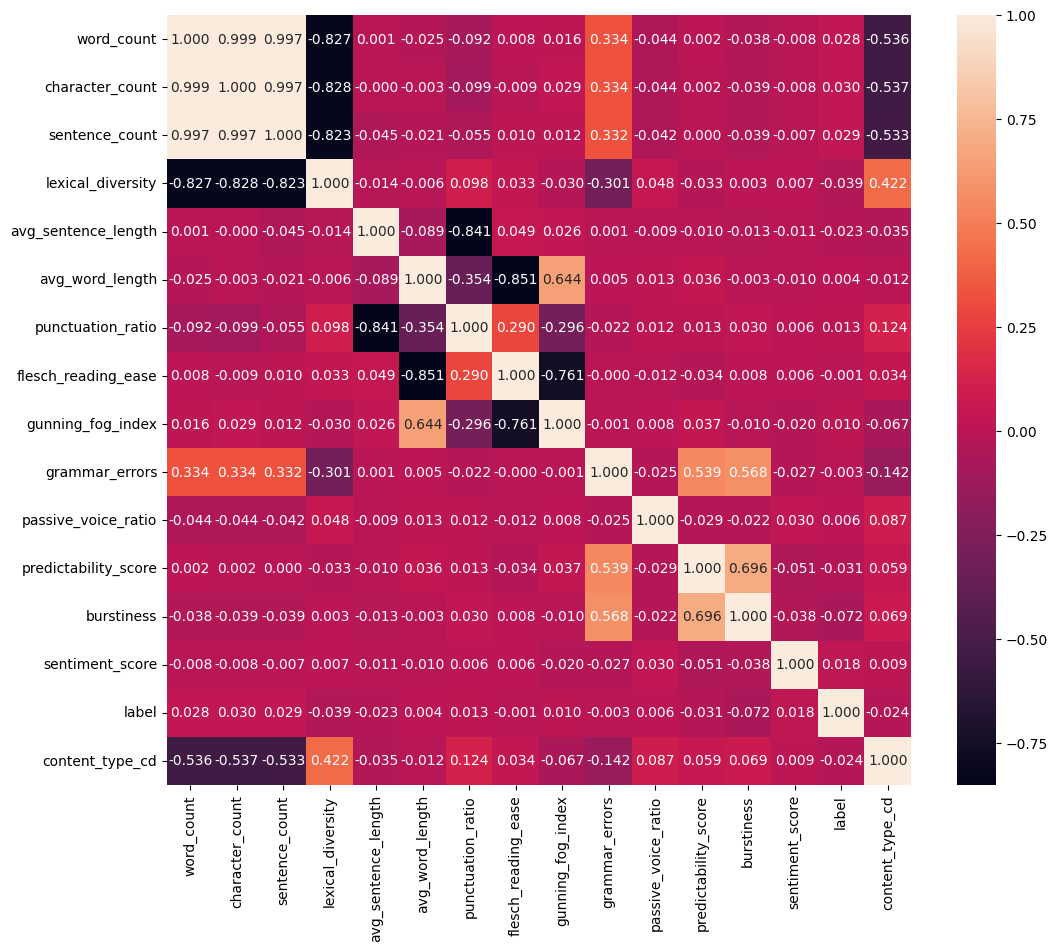

In [8]:
plt.figure(figsize=(12, 10))
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".3f")
plt.show()

### VIF - Variance Inflation Factor

Para cada feature, o VIF mede o quanto a variância do seu coeficiente estimado é "inflada" pela presença de outras features correlacionadas.


- VIF = 1: Nenhuma correlação.
- 1 < VIF < 5: Correlação moderada, geralmente não requer ação.
- VIF > 5 ou 10: Correlação alta e potencialmente problemática. Features com VIF acima desses valores são candidatas a serem removidas. (O limiar de 5 é mais rigoroso, o de 10 é mais comum).

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def calculate_vif(data):
    X_const = add_constant(data)
    vif = pd.DataFrame()
    vif['feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(X_const.values, i + 1) for i in range(len(data.columns))]
    return vif


In [17]:
selected_features = ['word_count', 'sentence_count', 'character_count']

In [18]:
vif_data = calculate_vif(corr_data[selected_features])
print(vif_data.sort_values(by='VIF', ascending=False))

           feature         VIF
0       word_count  964.631561
2  character_count  827.610140
1   sentence_count  190.945998


In [19]:
selected_features = ['sentence_count', 'character_count']

In [21]:

vif_data = calculate_vif(corr_data[selected_features])
print(vif_data.sort_values(by='VIF', ascending=False))

           feature         VIF
0   sentence_count  163.092602
1  character_count  163.092602
